# Polynomial Regression with Pipeline Concepts

### Before Getting dive into the Polynomial, we have to investigate if linear regression is suitable here or not!

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Collecting seaborn
     -------------------------------------- 293.3/293.3 kB 1.4 MB/s eta 0:00:00




[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Generating Equation
X = 6*np.random.rand(100,1) - 3
y = 0.5*X**2 + 1.5*X + 5 + np.random.randn(100,1) #last term added as outliers

Text(0, 0.5, 'Dependent')

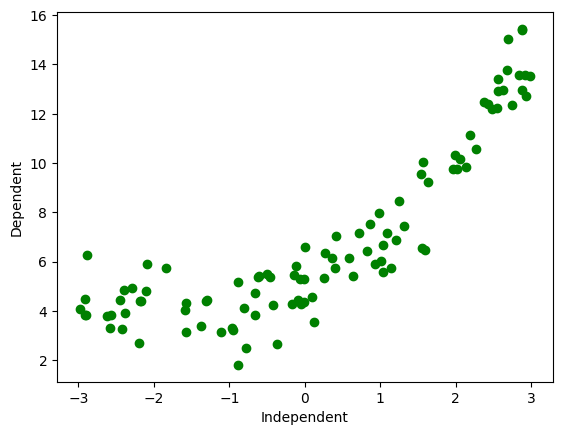

In [5]:
plt.scatter(X,y, color='g')
plt.xlabel("Independent")
plt.ylabel("Dependent")

Now, we have to apply linear regression!

In [6]:
#Splitting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [7]:
from sklearn.linear_model import LinearRegression
first_regression = LinearRegression()

In [8]:
first_regression.fit(X_train, y_train)

LinearRegression()

In [9]:
#Evaluation metrics (R2)
from sklearn.metrics import r2_score
score = r2_score(y_test, first_regression.predict(X_test))
score

0.8417463029364527

Text(0, 0.5, 'y')

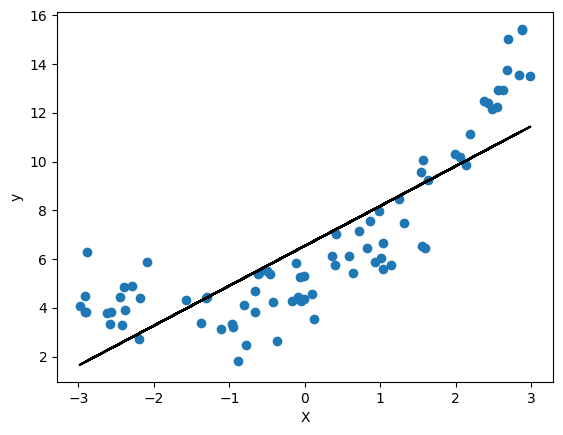

In [10]:
#Time for visualization
plt.plot(X_train, first_regression.predict(X_train), color='black')
plt.scatter(X_train, y_train)
plt.xlabel("X")
plt.ylabel("y")

Clearly, this is not the best fit line indeed!

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [12]:
X_train_poly
#Below, 3 parts define bias, b(1)*x(1), b(1)*x(1)**2

array([[ 1.00000000e+00, -2.61947561e+00,  6.86165247e+00],
       [ 1.00000000e+00, -6.60665508e-01,  4.36478914e-01],
       [ 1.00000000e+00, -2.29045498e+00,  5.24618402e+00],
       [ 1.00000000e+00,  2.87757593e+00,  8.28044322e+00],
       [ 1.00000000e+00,  2.13778908e+00,  4.57014216e+00],
       [ 1.00000000e+00, -7.80449840e-01,  6.09101952e-01],
       [ 1.00000000e+00,  2.69584973e+00,  7.26760575e+00],
       [ 1.00000000e+00,  9.32682403e-01,  8.69896465e-01],
       [ 1.00000000e+00,  1.22719957e-01,  1.50601878e-02],
       [ 1.00000000e+00,  8.69860254e-01,  7.56656861e-01],
       [ 1.00000000e+00, -3.73568894e-01,  1.39553719e-01],
       [ 1.00000000e+00, -2.08831510e+00,  4.36105994e+00],
       [ 1.00000000e+00, -2.58032316e+00,  6.65806763e+00],
       [ 1.00000000e+00,  1.63681975e+00,  2.67917888e+00],
       [ 1.00000000e+00, -2.89774963e+00,  8.39695293e+00],
       [ 1.00000000e+00, -1.29988916e+00,  1.68971183e+00],
       [ 1.00000000e+00, -1.10804387e+00

In [13]:
X_test_poly

array([[ 1.00000000e+00,  1.21431598e+00,  1.47456330e+00],
       [ 1.00000000e+00,  7.57599843e-03,  5.73957523e-05],
       [ 1.00000000e+00,  1.09056242e+00,  1.18932638e+00],
       [ 1.00000000e+00,  2.93801780e+00,  8.63194859e+00],
       [ 1.00000000e+00, -1.43326734e-01,  2.05425528e-02],
       [ 1.00000000e+00,  2.62636939e-01,  6.89781618e-02],
       [ 1.00000000e+00,  2.01481827e+00,  4.05949265e+00],
       [ 1.00000000e+00, -2.10275827e+00,  4.42159236e+00],
       [ 1.00000000e+00,  2.74176299e+00,  7.51726427e+00],
       [ 1.00000000e+00,  1.97115523e+00,  3.88545295e+00],
       [ 1.00000000e+00, -1.58231413e+00,  2.50371799e+00],
       [ 1.00000000e+00,  2.26971847e+00,  5.15162194e+00],
       [ 1.00000000e+00,  2.88398978e+00,  8.31739702e+00],
       [ 1.00000000e+00,  2.51131781e-01,  6.30671712e-02],
       [ 1.00000000e+00, -1.56861404e+00,  2.46055000e+00],
       [ 1.00000000e+00,  2.56702933e+00,  6.58963959e+00],
       [ 1.00000000e+00, -2.16400561e+00

In [14]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9040496180216868


In [15]:
regression.coef_

array([[0.        , 1.65512197, 0.56021914]])

In [17]:
regression.intercept_

array([4.79250619])

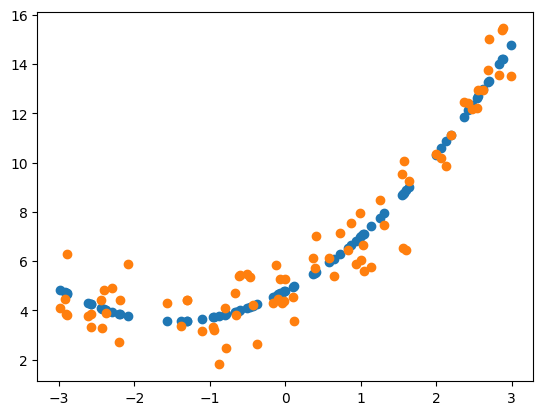

In [18]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [19]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [20]:
X_train_poly

array([[ 1.00000000e+00, -2.61947561e+00,  6.86165247e+00,
        -1.79739313e+01],
       [ 1.00000000e+00, -6.60665508e-01,  4.36478914e-01,
        -2.88366563e-01],
       [ 1.00000000e+00, -2.29045498e+00,  5.24618402e+00,
        -1.20161483e+01],
       [ 1.00000000e+00,  2.87757593e+00,  8.28044322e+00,
         2.38276041e+01],
       [ 1.00000000e+00,  2.13778908e+00,  4.57014216e+00,
         9.77000003e+00],
       [ 1.00000000e+00, -7.80449840e-01,  6.09101952e-01,
        -4.75373521e-01],
       [ 1.00000000e+00,  2.69584973e+00,  7.26760575e+00,
         1.95923730e+01],
       [ 1.00000000e+00,  9.32682403e-01,  8.69896465e-01,
         8.11337126e-01],
       [ 1.00000000e+00,  1.22719957e-01,  1.50601878e-02,
         1.84818559e-03],
       [ 1.00000000e+00,  8.69860254e-01,  7.56656861e-01,
         6.58185729e-01],
       [ 1.00000000e+00, -3.73568894e-01,  1.39553719e-01,
        -5.21329283e-02],
       [ 1.00000000e+00, -2.08831510e+00,  4.36105994e+00,
      

In [21]:
X_test_poly

array([[ 1.00000000e+00,  1.21431598e+00,  1.47456330e+00,
         1.79058577e+00],
       [ 1.00000000e+00,  7.57599843e-03,  5.73957523e-05,
         4.34830129e-07],
       [ 1.00000000e+00,  1.09056242e+00,  1.18932638e+00,
         1.29703465e+00],
       [ 1.00000000e+00,  2.93801780e+00,  8.63194859e+00,
         2.53608186e+01],
       [ 1.00000000e+00, -1.43326734e-01,  2.05425528e-02,
        -2.94429700e-03],
       [ 1.00000000e+00,  2.62636939e-01,  6.89781618e-02,
         1.81162133e-02],
       [ 1.00000000e+00,  2.01481827e+00,  4.05949265e+00,
         8.17913996e+00],
       [ 1.00000000e+00, -2.10275827e+00,  4.42159236e+00,
        -9.29753991e+00],
       [ 1.00000000e+00,  2.74176299e+00,  7.51726427e+00,
         2.06105569e+01],
       [ 1.00000000e+00,  1.97115523e+00,  3.88545295e+00,
         7.65883091e+00],
       [ 1.00000000e+00, -1.58231413e+00,  2.50371799e+00,
        -3.96166835e+00],
       [ 1.00000000e+00,  2.26971847e+00,  5.15162194e+00,
      

In [22]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8991647868716185


In [23]:
# New data Prediction
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

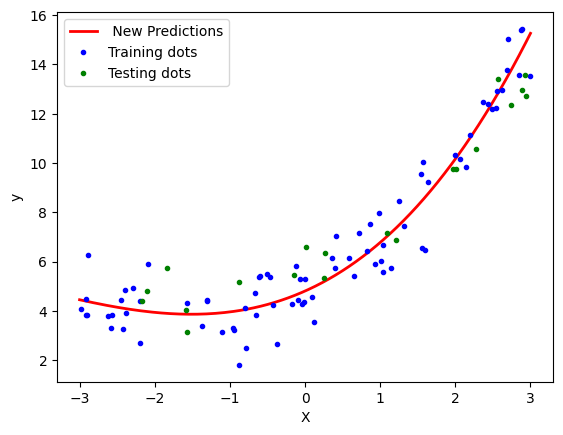

In [25]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training dots')
plt.plot(X_test, y_test, "g.",label='Testing dots')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline Basic

In [26]:
from sklearn.pipeline import Pipeline
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

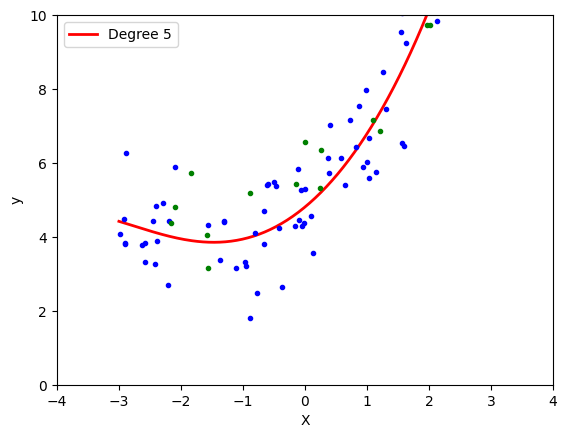

In [27]:
poly_regression(5)